In [1]:
import mne
from mne.preprocessing import ICA
import os
import scipy.signal
import numpy as np $
import argparse
import sys 

sys.argv = ['ipykernel_launcher.py', 'subj05_session1_eeg.fif']  # Example filename
parser = argparse.ArgumentParser(description='Preprocess EEG data')
parser.add_argument('input_file', type=str, help='Input file name', default='subj05_session1_eeg.fif')
args = parser.parse_args()

In [21]:
# Load the BDF file
root_path = "/Users/jonathan/Documents/coding/alljoined/alljoined_preprocessing"
fif_file_path = os.path.join(root_path, 'eeg_data', 'fif', args.input_file) 
print(fif_file_path)
raw = mne.io.read_raw_fif(fif_file_path, preload=True)

/Users/jonathan/Documents/coding/alljoined/alljoined_preprocessing/eeg_data/fif/subj05_session1_eeg.fif
Opening raw data file /Users/jonathan/Documents/coding/alljoined/alljoined_preprocessing/eeg_data/fif/subj05_session1_eeg.fif...
Isotrak not found
    Range : 0 ... 1779199 =      0.000 ...  3474.998 secs
Ready.
Reading 0 ... 1779199  =      0.000 ...  3474.998 secs...


In [6]:
raw.plot()

Using pyopengl with version 3.1.6


In [22]:
montage = mne.channels.make_standard_montage('standard_1020')
raw.set_montage(montage)

<Raw | subj05_session1_eeg.fif, 65 x 1779200 (3475.0 s), ~882.4 MB, data loaded>

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)


/Users/jonathan/mambaforge/envs/ajpreproc/lib/python3.12/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


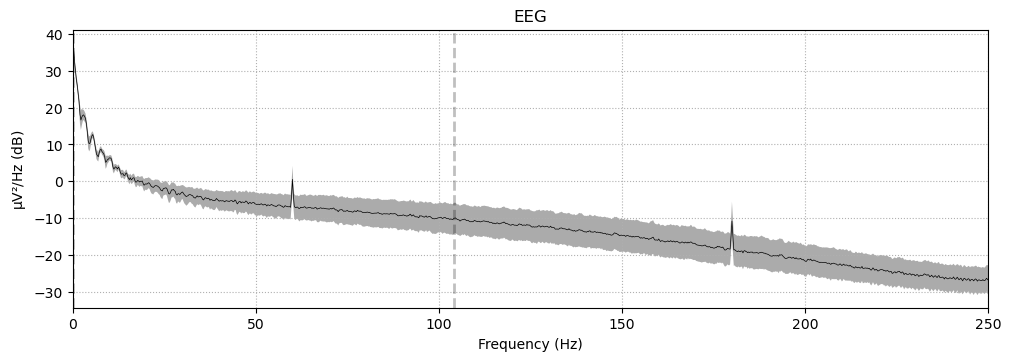

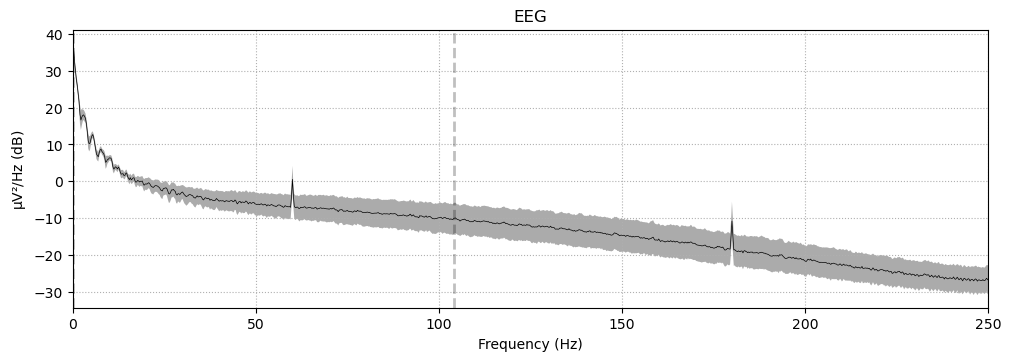

In [9]:
raw.plot_psd(tmax=np.inf, fmax=250, average=True)

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.000 (s)


/Users/jonathan/mambaforge/envs/ajpreproc/lib/python3.12/site-packages/mne/viz/utils.py:165: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  (fig or plt).show(**kwargs)


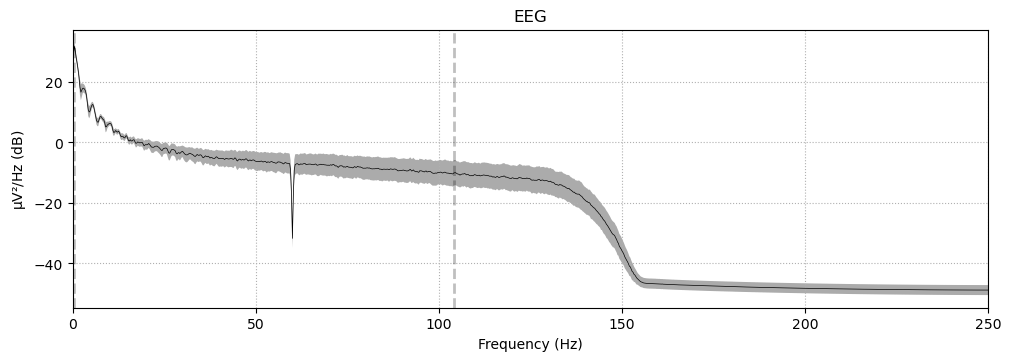

In [11]:
filt_raw.plot_psd(tmax=np.inf, fmax=250, average=True)

In [24]:
# raw.filter(l_freq=0.01, h_freq=40, fir_design='firwin')
# raw.notch_filter(freqs=50)

filt_raw = raw.copy().filter(l_freq=0.5, h_freq=125)
filt_raw.notch_filter(freqs=[60]) # remove 60 for wall outlet

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1.2e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 125.00 Hz
- Upper transition bandwidth: 31.25 Hz (-6 dB cutoff frequency: 140.62 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 59 - 61 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 59.35
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 59.10 Hz)
- Upper passband edge: 60.65 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 60.90 Hz)
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.4s


<Raw | subj05_session1_eeg.fif, 65 x 1779200 (3475.0 s), ~882.4 MB, data loaded>

In [25]:
# ICA
ica = ICA(n_components=0.95, random_state=97)
ica.fit(filt_raw)
ica

Fitting ICA to data using 64 channels (please be patient, this may take a while)
Selecting by explained variance: 8 components
Fitting ICA took 12.4s.


Method,fastica
Fit parameters,algorithm=parallelfun=logcoshfun_args=Nonemax_iter=1000
Fit,39 iterations on raw data (1779200 samples)
ICA components,8
Available PCA components,64
Channel types,eeg
ICA components marked for exclusion,—


In [44]:
explained_var_ratio = ica.get_explained_variance_ratio(filt_raw)
for channel_type, ratio in explained_var_ratio.items():
    print(
        f"Fraction of {channel_type} variance explained by all components: " f"{ratio}"
    )


Fraction of eeg variance explained by all components: 0.8231192989929146


In [18]:
ica.plot_sources(filt_raw)

# Looks like ica001 is heart
# what is ICA000?  EOG signal?


Creating RawArray with float64 data, n_channels=8, n_times=1779200
    Range : 0 ... 1779199 =      0.000 ...  3474.998 secs
Ready.
Using pyopengl with version 3.1.6


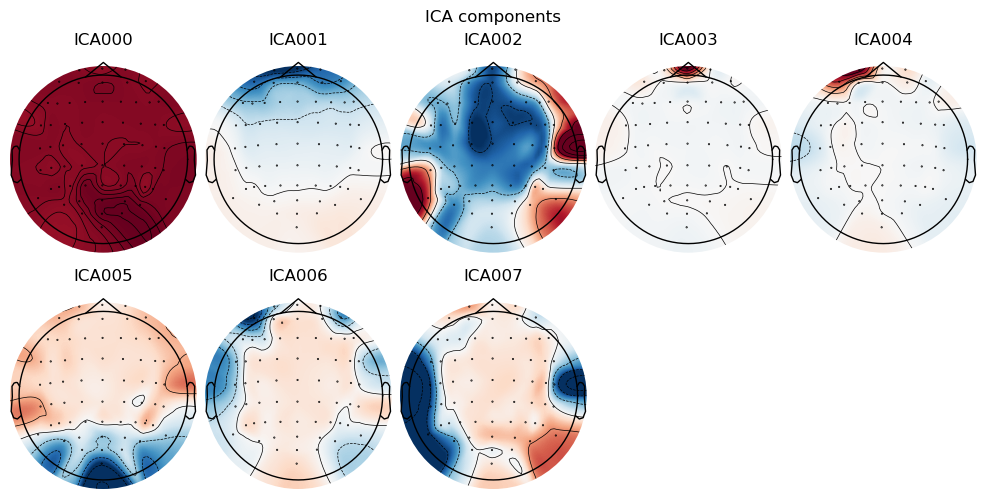

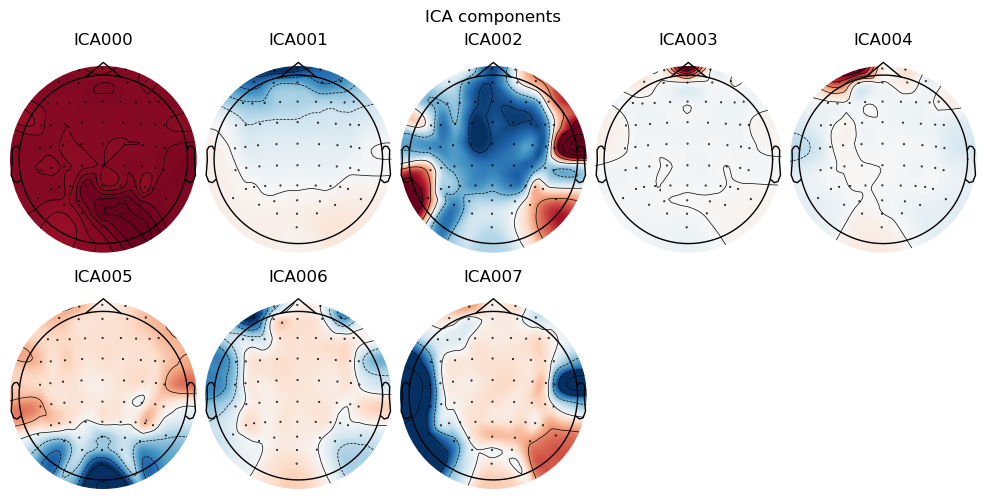

In [58]:
ica.plot_components()

Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 1 ICA component
    Projecting back using 64 PCA components


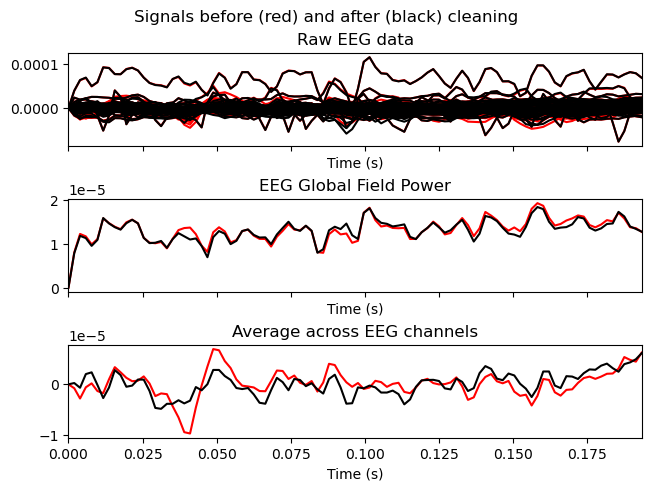

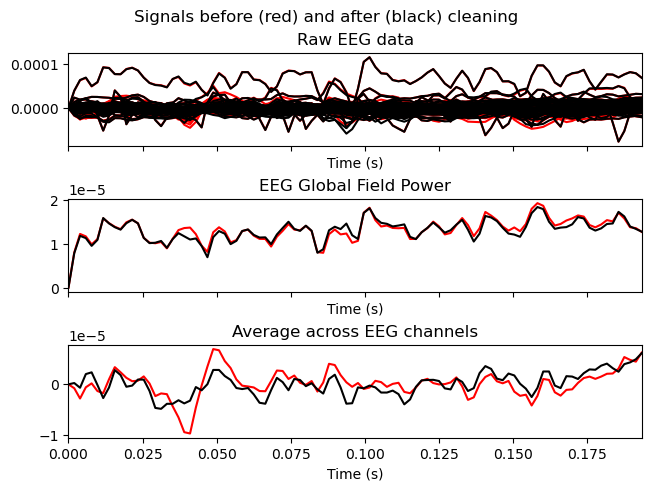

In [70]:
ica.plot_overlay(filt_raw, exclude=[1], picks="eeg", stop=100)


    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
1737 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
1737 matching events found
No baseline correction applied
0 projection items activated


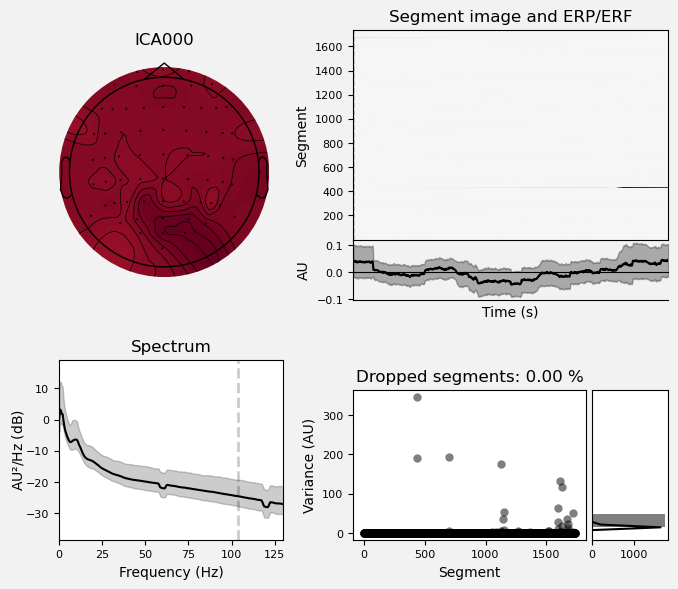

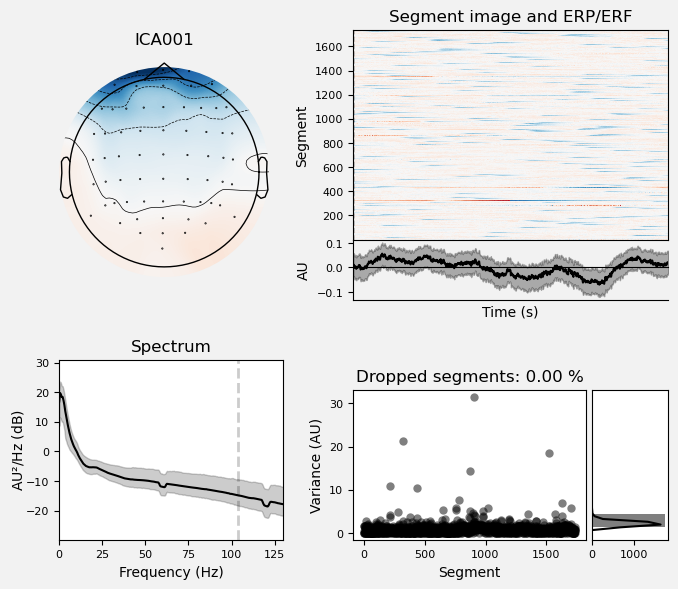

[<Figure size 700x600 with 6 Axes>, <Figure size 700x600 with 6 Axes>]

In [73]:
ica.plot_properties(filt_raw, picks=[0, 1])

In [27]:
# Excluding ICA 1:

ica.exclude = [1]
ica.apply(filt_raw)

Applying ICA to Raw instance
    Transforming to ICA space (8 components)
    Zeroing out 1 ICA component
    Projecting back using 64 PCA components


<Raw | subj05_session1_eeg.fif, 65 x 1779200 (3475.0 s), ~882.4 MB, data loaded>

In [28]:
filt_raw.plot()

Using pyopengl with version 3.1.6


In [29]:
# Detect events and Epoching (Step 10)
events = mne.find_events(filt_raw)
epochs = mne.Epochs(filt_raw, events, event_id=None, tmin=-0.05, tmax=0.65, preload=True)

# Automated Artifact Rejection (Step 12): Setting threshold to 700 µV
# todo: check also for -700e-6
reject_criteria = dict(eeg=700e-6)  # 700 µV = 700e-6 V
epochs.drop_bad(reject=reject_criteria)

# Remove 'Status' channel (Step 8). 
# Removing it here because you need this channel for earlier steps like creating epochs
filt_raw.drop_channels(['Status'])

1499 events found on stim channel Status
Event IDs: [  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234

<Raw | subj05_session1_eeg.fif, 64 x 1779200 (3475.0 s), ~868.8 MB, data loaded>

In [37]:
os.path.join('eeg_data', 'final_eeg', f"{root_name}_epo.fif" )

'eeg_data/final_eeg/subj05_session1_eeg_epo.fif'

In [42]:
# Rereferencing (Step 17)
epochs.set_eeg_reference('average')

# Baseline correction (Step 18)
# Baseline correction before ICA is not recommended by the MNE-Python developers, as it doesn’t guarantee optimal results.
epochs.apply_baseline(baseline=(-0.05, 0)) # look at time interval from 50ms from start to 0 seconds from start

# Saving the preprocessed data
root_name = os.path.splitext(args.input_file)[0][:-4]
preprocessed_file_path = os.path.join(root_path, 'eeg_data', 'final_eeg', f"{root_name}_epo.fif" )
os.makedirs(os.path.dirname(preprocessed_file_path), exist_ok=True)
epochs.save(preprocessed_file_path)

EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Applying baseline correction (mode: mean)


In [ ]:
# Automated ICA channel selection:
# Using an EOG channel


#If you don’t have an EOG channel, find_bads_eog has a ch_name parameter that you can use as a proxy for EOG. 
#You can use a single channel, or create a bipolar reference from frontal EEG sensors and use that as virtual EOG channel. 
#This carries a risk however: you must hope that the frontal EEG channels only reflect EOG and not brain dynamics 
#in the prefrontal cortex (or you must not care about those prefrontal signals).

ica.exclude = []
# find which ICs match the EOG pattern
eog_indices, eog_scores = ica.find_bads_eog(raw)
ica.exclude = eog_indices

# barplot of ICA component "EOG match" scores
ica.plot_scores(eog_scores)

# plot diagnostics
ica.plot_properties(raw, picks=eog_indices)

# plot ICs applied to raw data, with EOG matches highlighted
ica.plot_sources(raw, show_scrollbars=False)

# plot ICs applied to the averaged EOG epochs, with EOG matches highlighted
ica.plot_sources(eog_evoked)